In [1]:
import cv2
import numpy as np
import os
from scipy import optimize
from matplotlib import pyplot as plt

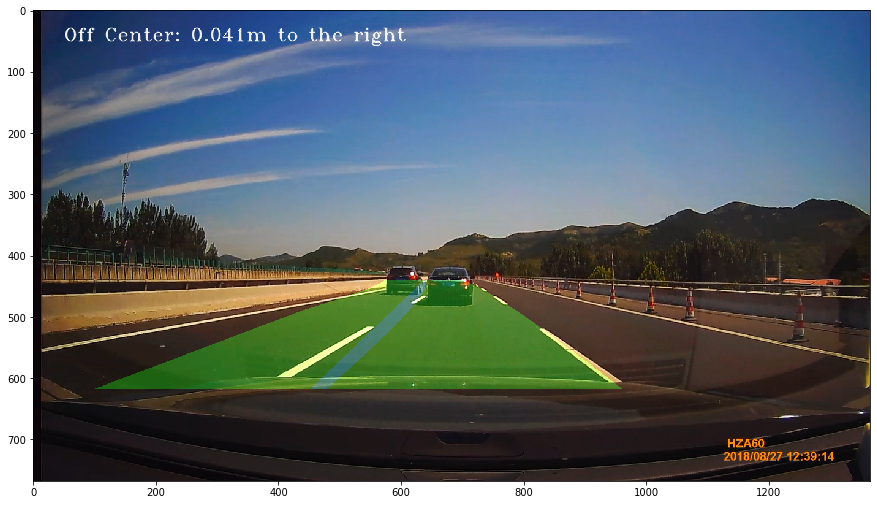

In [10]:
import cv2
import numpy as np
from LaneDetection.DetectLaneLines import detect_lanes


inp = cv2.imread("objs/car3.png")
# inp = cv2.resize(inp, (1280, 720))

inp = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
out= detect_lanes(inp)



plt.figure(figsize=(15,15))
out[-150:]=inp[-150:]

plt.imshow(out)

# cv2.imwrite("f3.jpg", out)

In [4]:
cap = cv2.VideoCapture('lane1.mp4')

# w = int(cap.get(3))
# h = int(cap.get(4))
   
# writer = cv2.VideoWriter('s1_mod.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w,h))

count=0
while True:
    
    ret ,frame = cap.read()
    if ret:
        #count+=1
        #if (count%2!=0):
        #    continue;
        frame = cv2.resize(frame, (1280,720))
        out = detect_lanes(frame)
#         (h, w) = frame.shape[:2]
#         writer.write(frame)
        #out[-150:,:]=frame[-150:]
        cv2.imshow('frame',out)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break         
            
            
    else:
        break
            
            
cap.release()
cv2.destroyAllWindows()
#writer.release()

In [ ]:
from moviepy.editor import VideoFileClip

# Where to save the output video
vid_output = 's1_laned.mp4'
# Location of the input video
clip1 = VideoFileClip("lanes/s1_mod.avi")
# Create the clip
vid_clip = clip1.fl_image(detect_lanes)
vid_clip.write_videofile(vid_output, audio=False)

In [6]:
cap = cv2.VideoCapture('lanes/s1.mp4')


writer = cv2.VideoWriter('s1_mod.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (1280,720))

count=0
while True:
    
    ret ,frame = cap.read()
    if ret:
        frame = cv2.resize(frame, (1280,720))
        (h, w) = frame.shape[:2]
        writer.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break         
            
            
    else:
        break
            
            
writer.release()
cap.release()
cv2.destroyAllWindows()